In [50]:
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [51]:
print(boston.keys())
print(boston.data.shape)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)


In [52]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [53]:
import numpy as np
import pandas as pd
 
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [54]:
# Ex. 1 Split train-test dataset
from sklearn.model_selection import train_test_split

boston_X = boston.data
boston_Y = boston.target

X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_Y, test_size = 0.2, random_state= 21)
print(boston_X.shape[0])
print(float(X_train.shape[0]) / float(boston_X.shape[0]))
print(float(X_test.shape[0]) / float(boston_X.shape[0]))

506
0.7984189723320159
0.2015810276679842


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

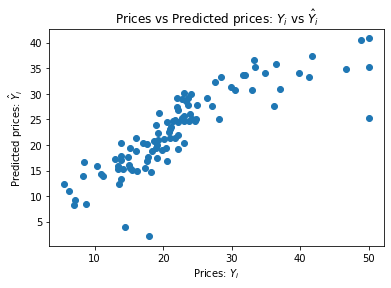

In [55]:
# Ex. 2 Linear regression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Creating an object
lin_regr = LinearRegression()

# Learning model on training data
lin_regr.fit(X_train, y_train)

# Predicting values using test data
Y_pred = lin_regr.predict(X_test)

plt.scatter(y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [56]:
# Ex. 3: To check the level of error of a model calculate the Mean Squared Error.
from sklearn.metrics import mean_squared_error

# MSE
print(f'MSE: {mean_squared_error(y_test, Y_pred)}')

MSE: 26.82540057393923


In [57]:
# Ex. 4: Calculate the model.score. Check what it is for linear problems.
print(f'score: {lin_regr.score(X_train, y_train)}')

score: 0.7456728277014533


In [58]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# Normalize the data using StandardScaler()
scaler = StandardScaler()

# Generate polynomial features (2nd degree polynomial)
polynomial_features = PolynomialFeatures(degree=2)



X_train_n = polynomial_features.fit_transform(X_train,y_train)
X_test_n = polynomial_features.fit_transform(X_test,y_test)

X_train_n = scaler.fit_transform(X_train_n)
X_test_n = scaler.fit_transform(X_test_n)

Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

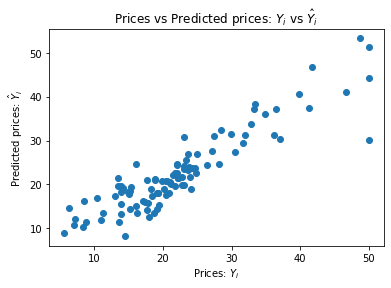

In [59]:
# Creating an object
lin_regr2 = LinearRegression()

# Learning model on training data
lin_regr2.fit(X_train_n, y_train)

# Predicting values using test data
Y_pred_n = lin_regr2.predict(X_test_n)

plt.scatter(y_test, Y_pred_n)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [60]:
print(f'MSE: {mean_squared_error(y_test, Y_pred_n)}')
print(f'score: {lin_regr2.score(X_train_n, y_train)}')

MSE: 15.911377919357863
score: 0.9408125342022848


In [61]:
# Ex. 5: Lasso
from sklearn.linear_model import Ridge, Lasso

# Creating an object
lasso_regr = Lasso(alpha=1)

# Learning model on training data
lasso_regr.fit(X_train, y_train)

# Predicting values using test data
Y_pred_lass = lasso_regr.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, Y_pred_lass)}')
print(f'Train score: {lasso_regr.score(X_train, y_train)}')
print(f'Test score: {lasso_regr.score(X_test, y_test)}')

MSE: 34.01339187044864
Train score: 0.681657779138689
Test score: 0.6385522982545612


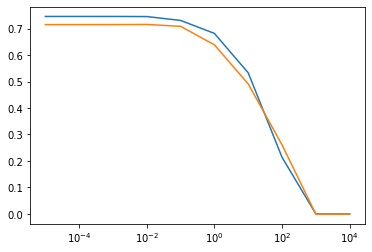

In [62]:
boston_X = boston.data
boston_Y = boston.target
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_Y, test_size = 0.2, random_state= 21)


alphas = [10**i for i in range(-5, 5, 1)]
train_scores = []
test_scores = []
for alp in alphas:
  lasso_regr = Lasso(alpha=alp)
  lasso_regr.fit(X_train, y_train)
  Y_pred_lass = lasso_regr.predict(X_test)
  train_scores.append(lasso_regr.score(X_train, y_train))
  test_scores.append(lasso_regr.score(X_test, y_test))

plt.plot(alphas,train_scores,alphas,test_scores)
plt.xscale("log")


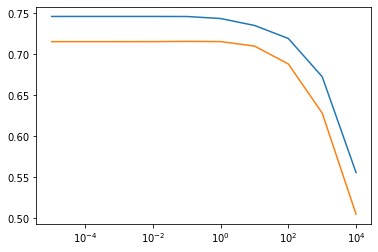

In [63]:
boston_X = boston.data
boston_Y = boston.target
X_train, X_test, y_train, y_test = train_test_split(boston_X, boston_Y, test_size = 0.2, random_state= 21)


alphas = [10**i for i in range(-5, 5, 1)]
train_scores = []
test_scores = []
for alp in alphas:
  ridge_regr = Ridge(alpha=alp)
  ridge_regr.fit(X_train, y_train)
  Y_pred_ridge = ridge_regr.predict(X_test)
  train_scores.append(ridge_regr.score(X_train, y_train))
  test_scores.append(ridge_regr.score(X_test, y_test))

plt.plot(alphas,train_scores,alphas,test_scores)
plt.xscale("log")

# Regularization for logistic regression

In [64]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
data = load_breast_cancer()
df = pd.DataFrame(data.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [65]:
df.isnull().values.any()

False

In [66]:
df.fillna(df.mean())

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.values, data.target, test_size=0.2, random_state=21)

In [68]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(penalty='l1', C=1, solver='liblinear', max_iter=200)
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.9385964912280702

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


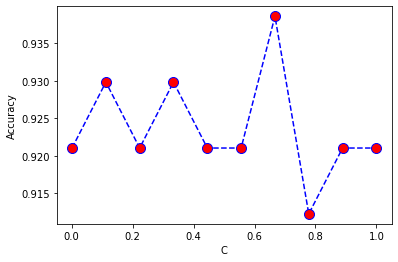

In [69]:
cs = np.linspace(0.001, 1.0, 10)
accuracies = []
for c in cs:
    reg = LogisticRegression(penalty='l2', C=c).fit(X_train, y_train)
    accuracies.append(reg.score(X_test, y_test))
plt.plot(cs,accuracies,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

# Regularization for kNN method

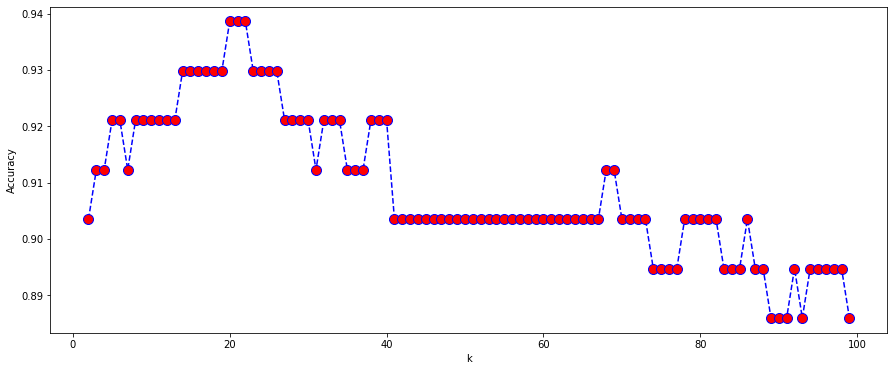

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

max_k = 100
accs_knn= []

for k in range(2,max_k):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X = X_train, y = y_train)
    y_pred = model.predict(X_test)
    accs_knn.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(15,6))
plt.plot(range(2,max_k),accs_knn,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

In [71]:
print(f"Best acurracy {max(accs_knn)} for k = {accs_knn.index(max(accs_knn))+1}")

Best acurracy 0.9385964912280702 for k = 19


# Decision trees optimization

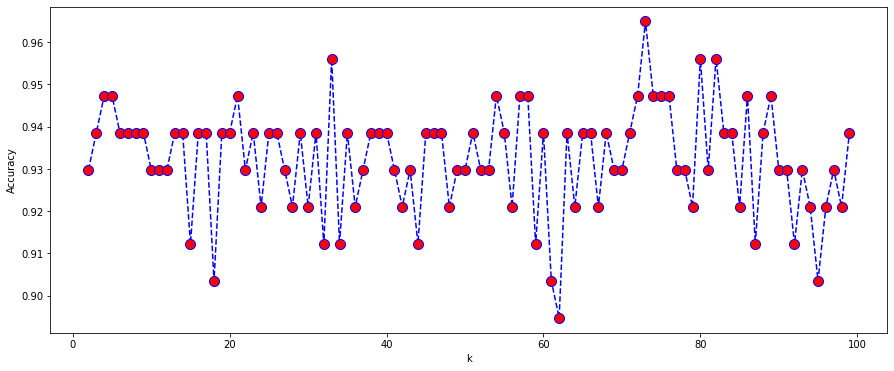

In [72]:
from sklearn.tree import DecisionTreeClassifier

max_d = 100
accs_tree = []

for depth in range(2,max_d):
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accs_tree.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(15,6))
plt.plot(range(2,max_d),accs_tree,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()    

In [73]:
print(f"Best acurracy {max(accs_tree)} for k = {accs_tree.index(max(accs_tree))+1}")

Best acurracy 0.9649122807017544 for k = 72
